# Car Price Prediction

In this session we will be using the used car data set to explore the various features, do some feature enginering, tune some parameters, create a ML model and store it to use whenever required

The columns in the given dataset are as follows:

Car_Name - Name of the car

Year - Year of Purchase

Selling_Price - Selling Price of the used car

Present_Price - Selling Price of the new car

Kms_driven - Total kilometers driven

Fuel - Type of fuels required

Seller_Type -  Type of the Seller

Transmission - Type of transmission

Owner - Number of owners the car had

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, accuracy_score

## Read the data

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Basecamp3\\GLabs_Data_Science_Learn\\Car_price_prediction\\data\\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### observations
1. Year is in int, however, its nature is catogorial in nature
2 Minmum present price of a vehichle is 32,000. How come

In [8]:
df.describe(exclude = np.number)

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


# EDA

### Number of cars in a given year

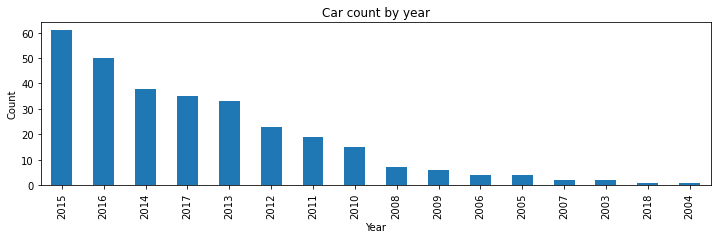

In [9]:
df['Year'].value_counts().plot(kind='bar',figsize=(12,3))
plt.title("Car count by year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Distribution of selling price

<AxesSubplot:ylabel='Frequency'>

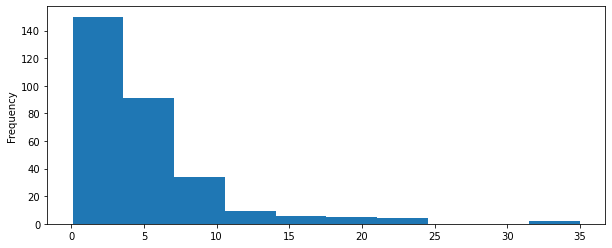

In [10]:
df["Selling_Price"].plot(kind='hist', figsize=(10,4)) 

<AxesSubplot:ylabel='Frequency'>

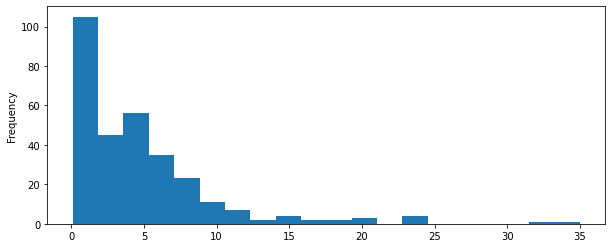

In [11]:
df["Selling_Price"].plot(kind='hist', figsize=(10,4), bins=20) 

<AxesSubplot:ylabel='Frequency'>

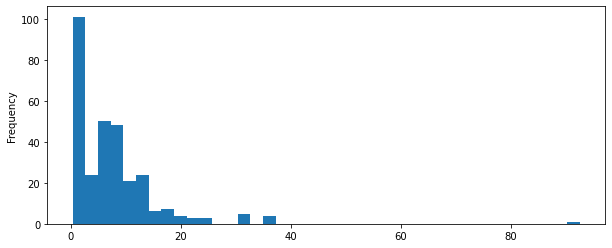

In [12]:
df["Present_Price"].plot(kind='hist', figsize=(10,4), bins=40) 

### Categories car w.r.t. Present Price

In [13]:
def car_segment(price):
    if price <=5:
        return 'economical'
    elif price <=10:
        return "normal"
    elif price <= 20:
        return "high_end"
    elif price > 20:        
        return "luxury"

In [14]:
df['Car_segment'] = df['Present_Price'].map(car_segment)

<AxesSubplot:>

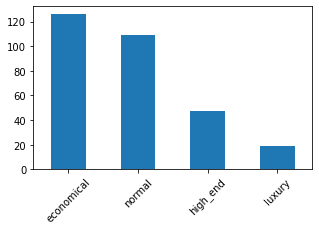

In [15]:
df['Car_segment'].value_counts().plot(kind='bar', figsize=(5,3), rot = 45)

### Distribution of KMs driven

<AxesSubplot:ylabel='Frequency'>

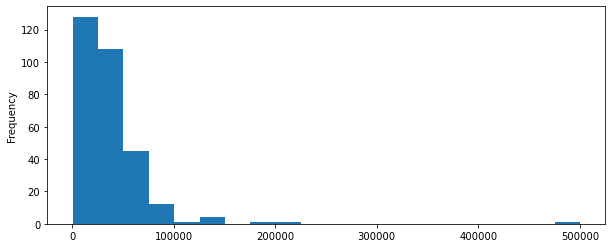

In [16]:
df["Kms_Driven"].plot(kind='hist', figsize=(10,4), bins=20) 

### creating segment for KMs Driven

In [17]:
def driven_segment(kms):
    if kms <10000:
        return 'Below10K'
    elif kms <30000:
        return 'Below30k'
    elif kms <50000:
        return 'Below50K'
    elif kms <100000:
        return 'Below100k'
    elif kms >= 100000:
        return 'Above100k'

<AxesSubplot:>

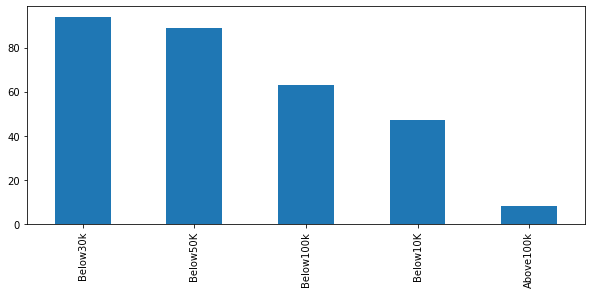

In [18]:
df['Driven_Segment'] = df['Kms_Driven'].map(driven_segment)
df['Driven_Segment'].value_counts().plot(kind='bar', figsize=(10,4))

In [19]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_segment,Driven_Segment
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,normal,Below30k
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,normal,Below50K
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,normal,Below10K
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,economical,Below10K
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,normal,Below50K


### Distribution of owners

In [20]:
df['Owner'].value_counts(normalize=True)*100

0    96.345515
1     3.322259
3     0.332226
Name: Owner, dtype: float64

### EDA - Categorical

In [23]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_segment',
       'Driven_Segment'],
      dtype='object')

### Car Name

<AxesSubplot:>

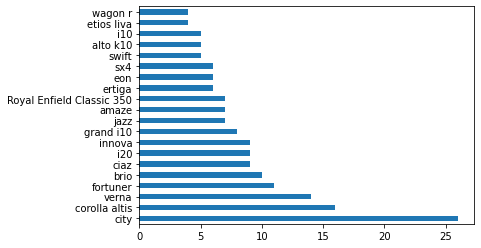

In [31]:
df['Car_Name'].value_counts(ascending=False)[:20].plot(kind='barh')

In [33]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

<AxesSubplot:>

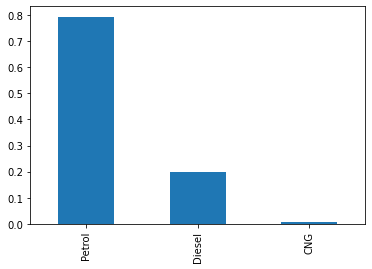

In [37]:
df['Fuel_Type'].value_counts(normalize=True).plot(kind='bar')

In [44]:
bikes_identifier = ['Royal Enfield','KTM', 'Bajaj','Hyosung','Yamaha', 'TVS','Hero','Activa','Honda Karizma', 'Suzuki Access 125', 'Honda CB', 'Mahindra Mojo']

def vehicle_type(name):
    if any(i in name for i in bikes_identifier):
        return "two_wheeler"
    return "four_wheeler"

In [45]:
df['Vehicle_type'] = df['Car_Name'].map(vehicle_type)

In [46]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_segment,Driven_Segment,Vehicle_type
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,normal,Below30k,four_wheeler
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,normal,Below50K,four_wheeler
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,normal,Below10K,four_wheeler
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,economical,Below10K,four_wheeler
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,normal,Below50K,four_wheeler


### count of 2 & 4 wheeler

In [47]:
df['Vehicle_type'].value_counts()

four_wheeler    202
two_wheeler      99
Name: Vehicle_type, dtype: int64

## EDA Bivariate

### Plot Present Price of bike and car

In [48]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_segment,Driven_Segment,Vehicle_type
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,normal,Below30k,four_wheeler
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,normal,Below50K,four_wheeler
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,normal,Below10K,four_wheeler
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,economical,Below10K,four_wheeler
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,normal,Below50K,four_wheeler


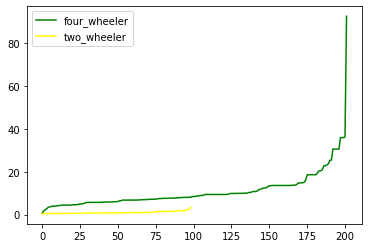

In [67]:
plt.plot(np.sort(df[df['Vehicle_type']=='four_wheeler']['Present_Price']), color='green', label='four_wheeler')
plt.plot(np.sort(df[df['Vehicle_type']=='two_wheeler']['Present_Price']), color='yellow', label='two_wheeler')
plt.legend()
plt.show()

## Plot the Target variable

## Plot the top 10 cars sold

## Create a pair plot of the entire data

## Verify our observations finding the correlation with the data

## Create a pivot table to find the number of cars sold every year for the top 10 selling cars

## Create a new feature which tells us how old the car is in terms of years

## Segregate the 'Car_Name' column into two parts keeping only the top 10 cars and the rest as others

## One Hot Encode the categorical columns

## Split the data into train and test parts

## Fit a base model using Linear regression

## Fit a base Gradient boosting model

## Do a Randomized Search CV on the GBR model, find out the best parameters and the results as well

## Package your model using pickle and store it